In [3]:
import pandas as pd
import json
import gzip
from tqdm import tqdm
import statistics
import math

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter
import plotly.express as px
import seaborn as sns

In [4]:
folder = "/Users/guwenli/Desktop/github/" 

In [5]:
df_channels = pd.read_csv(folder + "df_channels_en.tsv", sep="\t")
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435


In [6]:
df_metadata = pd.read_csv(folder + "metadata_mental_best.csv")
df_metadata

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,upload_month
0,Howto & Style,UCzWTH7VgNLUvxnC-mFJwO8Q,2019-11-22 22:25:49.938989,Today marks the 4 year anniversary of my ex bo...,30.0,HQAIQM_Um2Y,1494,1214.0,"alexis stone,alexis stone transformation",Processing Suicide | 4 Years After,2019-05-30,26436.0,2019-05
1,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:20:57.461781,A group at MIT’s Media Lab known as the “Dream...,118.0,ZBLejVwX85o,380,4778.0,"Judith Amores,MIT,sleep,dream,brain,neuroscien...",These Sleep Engineers Could Help You Hack Your...,2019-02-04,129857.0,2019-02
2,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:37.835071,How does long-distance swimmer Ben Lecomte mai...,60.0,1ehoP53A95s,359,2697.0,"mental health,AI,Ben Lecomte,model,Eduardo Mar...",How Do You Stay Sane for Months at Sea? | The ...,2018-11-19,120224.0,2018-11
3,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:58.976385,Are we dehumanizing people who are part of our...,551.0,KIwe_O0am4U,261,4141.0,"seeker,rehumanization,Mamoudou N’Diaye,nostalg...",How Our Brains Respond to People Who Aren't Li...,2018-10-17,83906.0,2018-10
4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:20:53.501610,"The experience of nostalgia, which feels good,...",352.0,ijVMWZAC6A8,277,1913.0,"seeker,schadenfreude,Mamoudou N’Diaye,nostalgi...",How Nostalgic Memories Manipulate Your Reality,2018-10-10,46160.0,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152066,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:44:51.681496,Shri Radha Mohan Singh's reply on rising the i...,0.0,J3KQdpLHRRo,4584,3.0,"BJP,Bharatiya Janata Party,BJP videos",Shri Radha Mohan Singh's reply on rising the i...,2017-07-26,159.0,2017-07
152067,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:44:44.574247,Shri La Ganesan's speech on rising the inciden...,0.0,hual8F0ORlk,516,10.0,"BJP,Bharatiya Janata Party,BJP videos",Shri La Ganesan's speech on rising the inciden...,2017-07-26,412.0,2017-07
152068,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:44:45.167242,Shri Ram Narain Dudi's speech on rising incide...,0.0,K9pbzKDZo2I,418,19.0,"BJP,Bharatiya Janata Party,BJP videos",Shri Ram Narain Dudi's speech on rising incide...,2017-07-25,667.0,2017-07
152069,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:44:45.844453,Shri Parshottam Rupala's speech on rising the ...,53.0,YqONHwlhy68,1002,423.0,"BJP,Bharatiya Janata Party,BJP videos",Shri Parshottam Rupala's speech on rising the ...,2017-07-25,67754.0,2017-07


In [7]:
# filtered_dataset = pd.merge(df_channels, df_metadata, left_on="channel", right_on="channel_id")
# filtered_dataset

Filter the channel dataset according to the mental health videos

In [8]:
# filter the channel with realeased videos about mental health
filtered_dataset = df_channels[df_channels['channel'].isin(df_metadata['channel_id'])]
filtered_dataset

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
8,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.0870
...,...,...,...,...,...,...,...,...
136434,Entertainment,2016-12-08,UCHhADtMaBfxHgDWH4unda6w,Kool Khaizer,10105,13,995516.0,53.1435
136435,People & Blogs,2008-12-27,UCnjDQQeRXmBVZTI8Nw9BRYQ,Wolfla The Wolf,10100,545,995627.0,53.1435
136442,People & Blogs,2018-07-11,UC9mdbZJBLOWQkHIpoaJPjeQ,_Nevaeh Crockett_,10100,54,996760.0,53.1435
136463,Entertainment,2016-11-08,UCf0RCfzyKoGr5AnLldeI1xw,On The Marc,10028,307,1007560.0,53.1435


still many inrrelevant channels like Kids Diana Show?

In [9]:
# Counting the number of unique channels for each category in the metadata mental health dataframe
channel_counts_metadata = df_metadata.groupby('categories')['channel_id'].nunique().reset_index(name='channel_count')

# Sorting categories by channel count
sorted_categories_metadata = channel_counts_metadata.sort_values(by='channel_count', ascending=False)

# Creating an interactive bar plot
fig_bar = px.bar(sorted_categories_metadata, x='categories', y='channel_count', color='channel_count',
            labels={'channel_count': 'Number of Channels', 'categories': 'Category'},
            title='Number of Mental Health Channels by Category',
            width=1200, height=600)

# Show the plot
fig_bar.show()

Entertainment is the highest? many of them are irrelevant.

In [10]:
# Creating an interactive pie chart
fig_pie = px.pie(sorted_categories_metadata, names='categories', values='channel_count',
            title='Distribution of Mental Health Channels by Category')

# Show the plot
fig_pie.show()

In [11]:
# Example for views distribution with log scale
fig = px.histogram(filtered_dataset, x='subscribers_cc', nbins=50, log_y=True, title='Log-scaled Histogram of Views')
fig.update_layout(xaxis_title='Views (Log Scale)', yaxis_title='Frequency (Log Scale)')

# Show the plot
fig.show()

Text(0, 0.5, 'the number of subscribers')

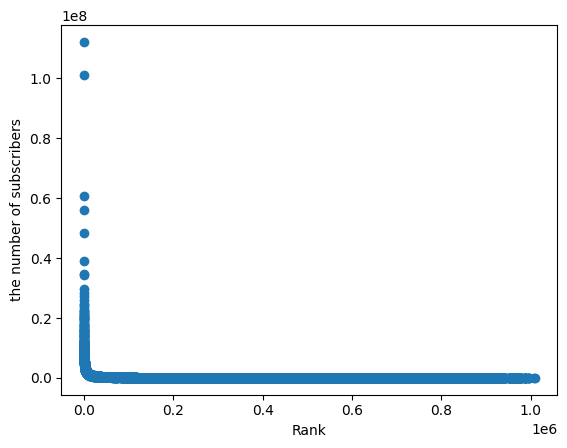

In [15]:
plt.scatter(filtered_dataset['subscriber_rank_sb'], filtered_dataset['subscribers_cc'])

plt.xlabel('Rank')
plt.ylabel('the number of subscribers')

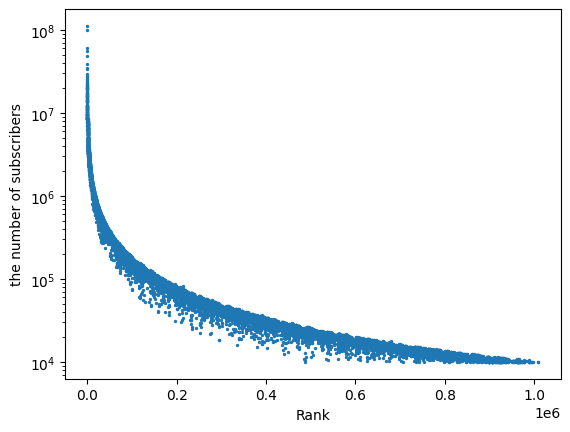

In [20]:
plt.scatter(filtered_dataset['subscriber_rank_sb'], filtered_dataset['subscribers_cc'], s =2)
plt.xlabel('Rank')
plt.ylabel('the number of subscribers')
plt.yscale('log')  # This line sets the y-axis to log scale

plt.show()

can see the a sharp decrease around 10^5. After that, decrease slowly --> the number of subscribers quite similar but rank varies. 

Text(0, 0.5, 'the number of videos uploaded')

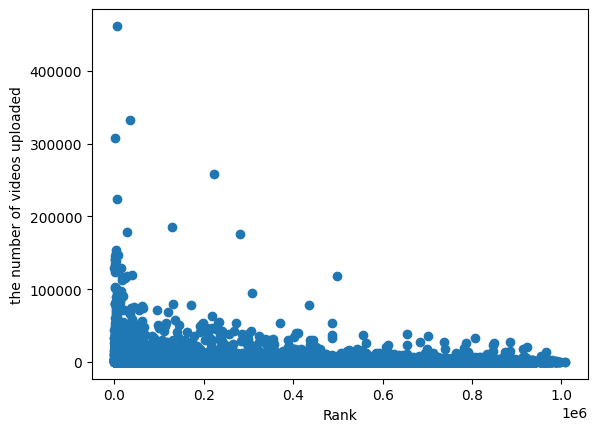

In [16]:
plt.scatter(filtered_dataset['subscriber_rank_sb'], filtered_dataset['videos_cc'])

plt.xlabel('Rank')
plt.ylabel('the number of videos uploaded')

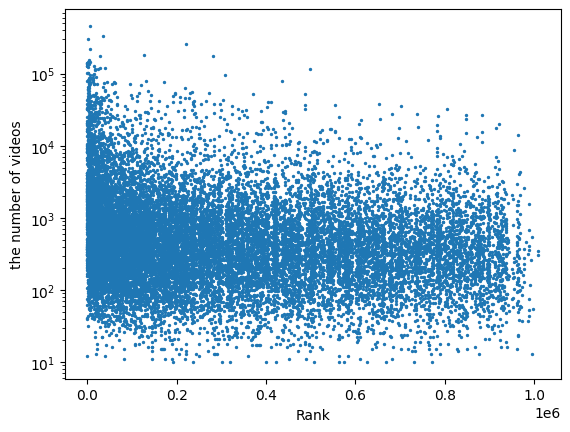

In [19]:
plt.scatter(filtered_dataset['subscriber_rank_sb'], filtered_dataset['videos_cc'], s =2)
plt.xlabel('Rank')
plt.ylabel('the number of videos')
plt.yscale('log')  # This line sets the y-axis to log scale

plt.show()

no significant correlations between video rank and the number of videos it released

Now let's look at the joining year of the channels

/var/folders/55/m_srhfjd3178_f4w0ztbx7qr0000gn/T/ipykernel_51548/1931971025.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



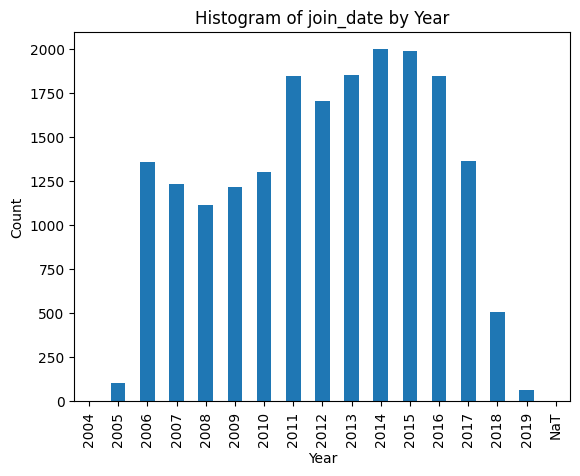

In [22]:
# Extract the first four numbers (year) from the "join_date" column
filtered_dataset['year'] = filtered_dataset['join_date'].astype(str).str[:4]

# Group the data by year and count the occurrences
year_counts = filtered_dataset['year'].value_counts().sort_index()

# Create a histogram using the counts for each year
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of join_date by Year')
plt.show()